# NLP Group Project 
## Heather's Notebook

In [1]:
import pandas as pd
import numpy as np
import unicodedata
import re
import nltk

# imports for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm # for colormap tools
import seaborn as sns
from wordcloud import WordCloud

# import modules 
import prepare as p
import acquire as a
import explore as ex
import model as m

# imports for NLP extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix


plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Heather/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_json('data2.json')

In [3]:
df.head()

,repo,language,readme_contents
0,codingXiaxw/CustomerManagement,Java,## JavaWeb项目之客户管理系统 \n\n## 项目介绍\n详细讲解请点击这里前往我的...
1,DanWahlin/CustomerManager,JavaScript,Customer Manager with AngularJS (with custom r...
2,Tophold/FinancialCustomerView,Java,## FinancialCustomerView\n* 本项目会对金融交易软件中存在的各种V...
3,DanWahlin/CustomerManagerStandard,JavaScript,Customer Manager with AngularJS\r\n===========...
4,spring-cloud-samples/customers-stores,Java,# REST based micro-services sample\n\n- Three ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             194 non-null    object
 1   language         187 non-null    object
 2   readme_contents  194 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


In [5]:
df.language.value_counts()

PHP                 41
Jupyter Notebook    32
JavaScript          25
Java                23
Python              20
C#                  12
R                    4
TypeScript           4
HTML                 4
Go                   3
Vue                  3
Ruby                 3
HCL                  2
Dart                 2
CSS                  2
PowerShell           2
Objective-C          1
Shell                1
Scala                1
ABAP                 1
Swift                1
Name: language, dtype: int64

In [6]:
df = p.drop_unneeded_data(df)

<AxesSubplot:>

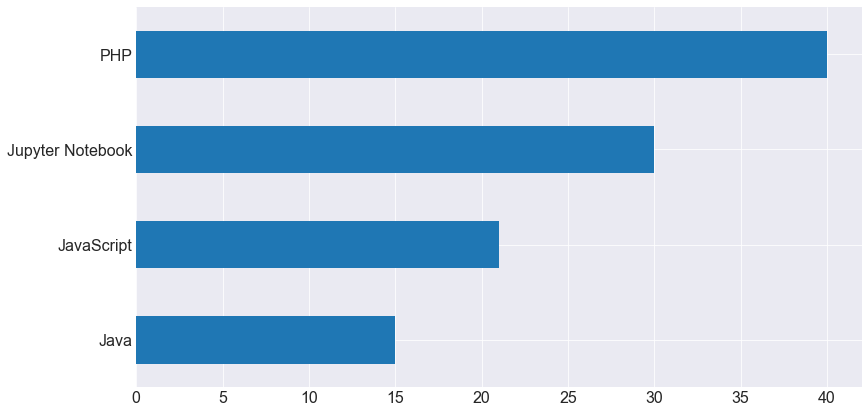

In [7]:
df.language.value_counts().sort_values(ascending = True).plot.barh()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             106 non-null    object
 1   language         106 non-null    object
 2   readme_contents  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


### Explore Data
- Will explore lemmatized data
- try to find common words 
- 4 different categories, JavaScript, Java, Jupyter Notebook, PHP
    - PHP is a general-purpose scripting language geared towards web development
    - Java - programming language, object oriented, standalone language
    - JavaScript - Scripting language needs to be integrated into an HTML program for execution.
    - Jupyter notebook has raw code that is a JSON but is an interface for other programming languages

In [91]:
df = pd.read_json('data2.json')
df = p.drop_unneeded_data(df)


df = p.prepare_nlp_data(df, content = 'readme_contents', extra_words=['customer', 'customers', '1', '2'])

In [92]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,DanWahlin/CustomerManager,JavaScript,Customer Manager with AngularJS (with custom r...,manager angularjs custom routing dynamic contr...,manag angularj custom rout dynam control scrip...,manager angularjs custom routing dynamic contr...
1,DanWahlin/CustomerManagerStandard,JavaScript,Customer Manager with AngularJS\r\n===========...,manager angularjs youre new angularjs check an...,manag angularj your new angularj check angular...,manager angularjs youre new angularjs check an...
2,spring-cloud-samples/customers-stores,Java,# REST based micro-services sample\n\n- Three ...,rest based microservices sample three spring b...,rest base microservic sampl three spring boot ...,rest based microservices sample three spring b...
3,eventuate-tram/eventuate-tram-examples-custome...,Java,# Eventuate Tram Customers and Orders\n\nThis ...,eventuate tram orders application demonstrates...,eventu tram order applic demonstr two key patt...,eventuate tram order application demonstrates ...
4,Featuretools/predict-customer-churn,Jupyter Notebook,# A Machine Learning Framework with an Applica...,machine learning framework application predict...,machin learn framework applic predict churn im...,machine learning framework application predict...


In [93]:
all_word_counts = ex.get_word_counts_series(df, 'lemmatized')
java_word_counts = ex.get_word_counts_series(df[df.language == 'Java'], 'lemmatized')
javascript_word_counts = ex.get_word_counts_series(df[df.language == 'JavaScript'], 'lemmatized')
php_word_counts = ex.get_word_counts_series(df[df.language == 'PHP'], 'lemmatized')
jupyter_word_counts = ex.get_word_counts_series(df[df.language == 'Jupyter Notebook'], 'lemmatized')

In [94]:
all_word_counts[all_word_counts.index == 'customer']

Series([], dtype: int64)

- Since we searched for `customer` those will be in every single one 
- That word is removed in the prep function above

In [95]:
word_counts_list = [java_word_counts, javascript_word_counts, php_word_counts, jupyter_word_counts, all_word_counts]
column_names = list(df.language.unique())
column_names.append('all')

languages = list(df.language.unique())

In [96]:
word_counts = pd.concat(word_counts_list, axis=1).fillna(0).astype(int)
word_counts.columns = column_names
word_counts.head()

,JavaScript,Java,Jupyter Notebook,PHP,all
service,184,43,4,27,258
order,163,5,58,12,238
saga,69,0,0,0,69
using,68,44,32,82,226
event,63,8,13,42,126


In [97]:
blues = [ '#f1faee', '#a8dadc', '#457b9d', '#1d3557', '#e63946']

<Figure size 1152x648 with 0 Axes>

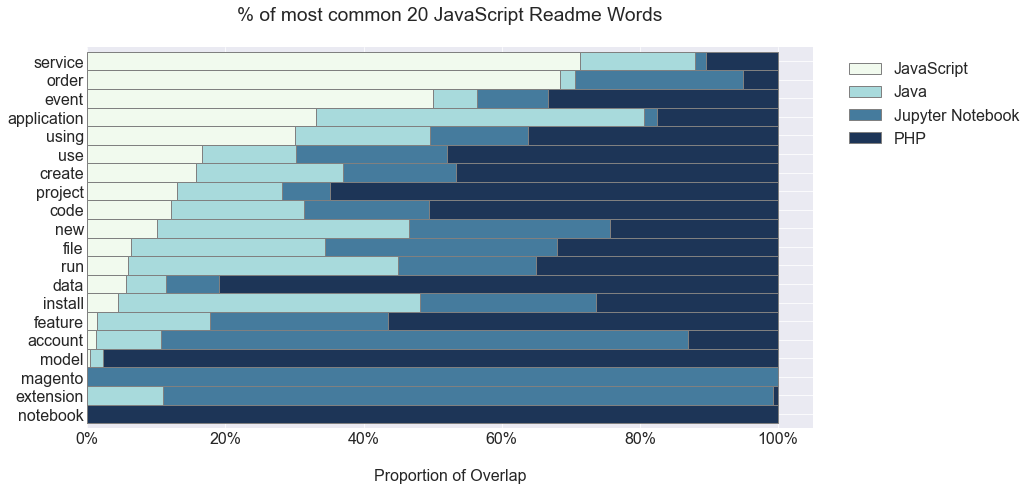

<Figure size 1152x648 with 0 Axes>

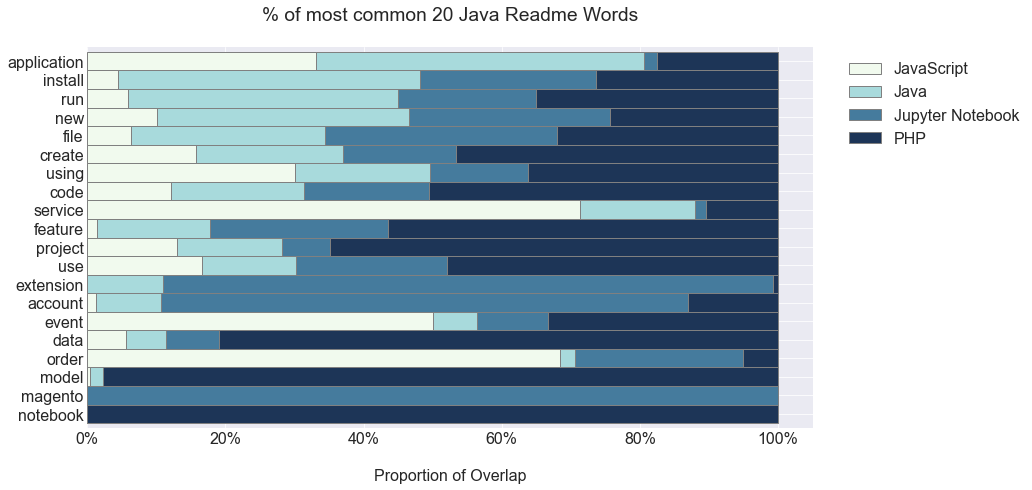

<Figure size 1152x648 with 0 Axes>

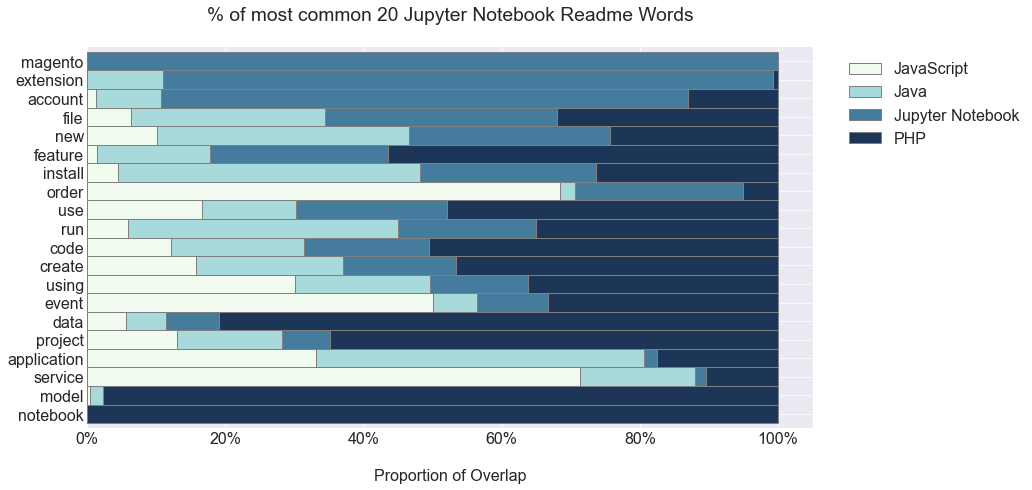

<Figure size 1152x648 with 0 Axes>

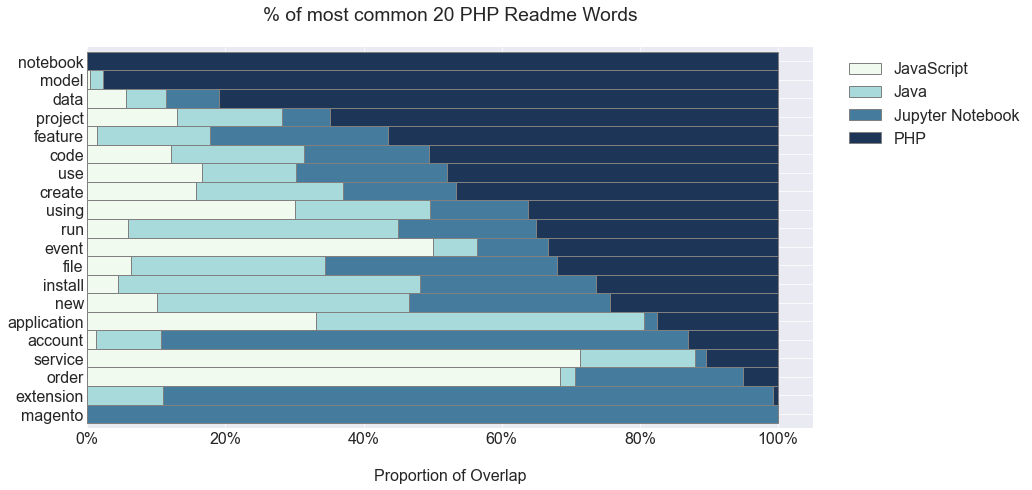

In [98]:
for language in languages:
    ex.plot_overlap_stacked_bar(word_counts, language, colors=blues)

### Takeaways
- 'magento' is only in jupyter notebooks
- 'extension' mostly in jupyter notebooks but only found elsewhere in Java readmes
- 'model' is very common for php, close to 95% 
- 'notebook' is only in PHP. Weird that it's not in jupyter readmes at all 

#### Words to remove
- 1
- 2

### Next Steps
- Create Bigrams
- Create Trigrams